In [ ]:
# Copyright (c) 2020-2021, NVIDIA CORPORATION.  All rights reserved.
#
# NVIDIA CORPORATION and its licensors retain all intellectual property
# and proprietary rights in and to this software, related documentation
# and any modifications thereto.  Any use, reproduction, disclosure or
# distribution of this software and related documentation without an express
# license agreement from NVIDIA CORPORATION is strictly prohibited.
# Cleanup application
simulation_app.close()


In [1]:
import getpass

user = getpass.getuser()
from isaacsim import SimulationApp

# Set the path below to your desired nucleus server
# Make sure you installed a local nucleus server before this
simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/yudaniel888/temp_jupyter_stage.usd"})


Starting kit application with the following args:  ['/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True', '--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--/app/fastShutdown=False', '--ext-folder', '/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/exts', '--ext-folder', '/home/bigcowfish/.local/share/ov/pkg/isaac-sim-4.1.0/apps', '--/physics/cudaDevice=0', '--portable', '--no-window', '--/app/window/hideUi=1']
Passing the following args to the base kit application:  ['-f', 

field-1.1.6] startup
[1.583s] [ext: omni.kit.widget.viewport-106.0.3] startup
[1.585s] [ext: omni.kit.viewport.registry-104.0.6] startup
[1.585s] [ext: omni.kit.widget.text_editor-1.0.2] startup
[1.586s] [ext: omni.kit.viewport.window-106.0.8] startup
[1.596s] [ext: omni.kit.window.property-1.11.1] startup
[1.597s] [ext: omni.usdphysics-106.0.20] startup
[1.599s] [ext: omni.graph.tools-1.78.0] startup
[1.610s] [ext: omni.kit.viewport.utility-1.0.17] startup
[1.610s] [ext: omni.kit.property.usd-3.21.28] startup
[1.615s] [ext: omni.graph-1.135.0] startup
[1.676s] [ext: omni.graph.image.core-0.3.2] startup
[1.679s] [ext: omni.graph.ui-1.70.0] startup
[1.703s] [ext: omni.graph.action_core-1.1.4] startup
[1.709s] [ext: omni.kit.window.cursor-1.1.2] startup
[1.710s] [ext: omni.graph.image.nodes-1.0.2] startup
[1.711s] [ext: omni.graph.action_nodes-1.23.0] startup
[1.716s] [ext: omni.kit.viewport.menubar.core-106.0.2] startup
[1.729s] [ext: omni.graph.nodes-1.143.0] startup
[1.737s] [ext: omn

AttributeError: 'NoneType' object has no attribute 'set_tooltip'

In [3]:
from omni.isaac.core import World
from omni.isaac.core.objects import DynamicCuboid
import numpy as np

from omni.isaac.franka import Franka
from omni.isaac.franka.controllers import PickPlaceController
from omni.isaac.franka.controllers.stacking_controller import StackingController
from omni.isaac.franka.tasks import Stacking

from omni.isaac.sensor import Camera

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from omni.isaac.sensor import Camera

In [5]:
world = World(stage_units_in_meters=1.0)
world.scene.add_default_ground_plane()
# A render/ step or an update call is needed to reflect the changes to the opened USD in Isaac Sim GUI
#  Note: avoid pressing play/ pause or stop in the GUI in this workflow.

#Da Cameraaaaaaaaaa lahhhhhhhhhhhhhhhhhhh
resolution = (1920, 1080)
camera = world.scene.add(Camera(prim_path="/World/Fancy_Camera", name="fancy_camera", position=np.array([-5.0, 0.0, 0.4]), orientation=np.array([1.0, 0.0, 0.0, 0.0]), resolution=resolution))
franka = world.scene.add(Franka(prim_path="/World/Fancy_Franka", name="fancy_franka"))
fancy_cube = world.scene.add(
    DynamicCuboid(
        prim_path="/World/random_cube",
        name="fancy_cube",
        position=np.array([0.3, 0.3, 0.3]),
        orientation=np.array([1, 0, 0, 0]),
        scale=np.array([0.05015, 0.05015, 0.05015]),
        size=1.0,
        color=np.array([0, 0, 1.0]),
    )
)
plate_1 = world.scene.add(
    DynamicCuboid(
        prim_path="/World/plate_1",
        name="plate_1",
        position=np.array([0.5, 0.5, 0.0]),
        scale=np.array([0.2, 0.2, 0.01]),
        size=1.0,
        color=np.array([0, 1.0, 0.0]),
    )
)
world.render()
world.reset()


In [7]:
# This opens the franka finger
world.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_opened_positions)

for i in range(10):
    print(franka.gripper.get_joint_positions())
    world.step(render=True)  # execute one physics step and one rendering step
    
world.render()

[0.05 0.05]
[0.03999998 0.04      ]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]


In [9]:
# This closes the franka finger
world.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_closed_positions)

for i in range(10):
    print(franka.gripper.get_joint_positions())
    world.step(render=True)  # execute one physics step and one rendering step
    
world.render()

[0. 0.]
[9.0769836e-09 1.4597541e-08]
[1.1288139e-08 5.9437366e-09]
[2.6060096e-08 2.4653152e-08]
[2.1479543e-08 1.9357927e-08]
[1.8931997e-08 1.7518314e-08]
[1.6839682e-08 1.5424702e-08]
[1.5182820e-08 1.3765865e-08]
[1.39726515e-08 1.34758800e-08]
[1.3267912e-08 1.0263303e-08]


In [11]:
# Set franka controller
franka_controller = PickPlaceController(name="pick_place_controller", gripper=franka.gripper, robot_articulation=franka,)
print(franka_controller.is_done())

False


In [13]:
# Franka reset
franka_controller.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_opened_positions)

for i in range(10):
    print(franka.gripper.get_joint_positions())
    world.step(render=True)  # execute one physics step and one rendering step
    

[0.05 0.05]
[0.03999999 0.04      ]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]
[0.04 0.04]


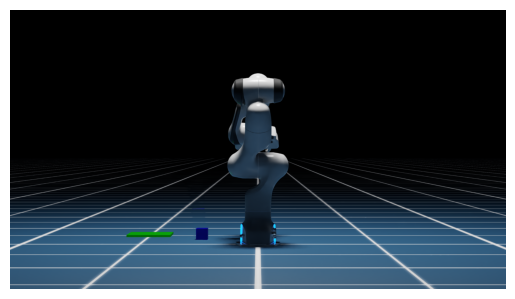

In [15]:
# Trying out camera
import matplotlib.pyplot as plt
camera.initialize()
#print(camera)
rgb_array = camera.get_rgb();
plt.imshow(rgb_array)
plt.axis("off")  # Hide the axes
plt.show()

In [37]:
# Cube moving experiment
# TODO: Set random start position between x = 0.3 to 0.5, y = 0.1 to 0.3
# TODO: Set random end position between x = -0.3 to -0.5, y = -0.1 to -0.3
import random
# One iteration

def physical_step(da_cube, da_bot, da_control, goal_position):
    # TODO: Add a goal position
    # Feedback
    cube_position, _ = da_cube.get_world_pose()
    goal_position = goal_position + np.array([0, 0, 0.0615 / 2.0])
    current_joint_positions = da_bot.get_joint_positions()
    actions = da_control.forward(
        picking_position=cube_position,
        placing_position=goal_position,
        current_joint_positions=current_joint_positions,
    )

    da_bot.apply_action(actions)
    # Only for the pick and place controller, indicating if the state
    # machine reached the final state.
    return da_control.is_done()

def randomize_starting_position(world, fancy_cube, plate_1):
    world.reset()
    fancy_cube.set_world_pose(position=[random.uniform(0.3, 0.5), random.uniform(0.1, 0.3), 0.0])
    goal_position = np.array([random.uniform(-0.3, -0.5), random.uniform(-0.3, -0.5), 0.0])
    plate_1.set_world_pose(position=goal_position)
    return goal_position

def freeze_to_update(world):
    for i in range(10):
        world.step(render=True)  # execute one physics step and one rendering step
        

#world.reset()
#fancy_cube.set_world_pose(position=[random.uniform(0.3, 0.5), random.uniform(0.1, 0.3), 0.0])
#goal_position = np.array([random.uniform(-0.3, -0.5), random.uniform(-0.3, -0.5), 0.0])
#plate_1.set_world_pose(position=goal_position)

goal_position = randomize_starting_position(world, fancy_cube, plate_1)
freeze_to_update(world)

In [35]:
# One time test
franka_controller.reset()
franka.gripper.set_joint_positions(franka.gripper.joint_opened_positions) 

# Video related
# Initialize variables
frames = []
# Directory to save images
output_images_dir = "4"
os.makedirs(output_images_dir, exist_ok=True)  # Create the directory if it doesn't exist

until = 70;

for i in range(5000):
    if i % until == 0:
        rgb_array = camera.get_rgb();
        # Convert RGB to BGR format for OpenCV compatibility
        bgr_array = cv2.cvtColor(rgb_array, cv2.COLOR_RGB2BGR)
        # Define filename for each frame
        filename = os.path.join(output_images_dir, f"frame_{i:04d}.png")
        # Save the image
        cv2.imwrite(filename, bgr_array)
        frames.append(rgb_array)
    if physical_step(fancy_cube, franka, franka_controller, goal_position):
        world.step(render=True)  # execute one physics step and one rendering step
        print("Doneee")
        break
    #position, orientation = fancy_cube.get_world_pose()
    #linear_velocity = fancy_cube.get_linear_velocity()
    #print("Cube position is : " + str(position))
    #print("Cube's orientation is : " + str(orientation))
    #print("Cube's linear velocity is : " + str(linear_velocity))
    # we have control over stepping physics and rendering in this workflow
    # things run in sync
    world.step(render=True)  # execute one physics step and one rendering step



Doneee


In [45]:
# Testing and training data collection
number_of_video_datas = 25;
until = 25;

for i in range(number_of_video_datas):
    print("start collecting video", i)
    goal_position = randomize_starting_position(world, fancy_cube, plate_1)
    freeze_to_update(world);
    
    franka_controller.reset()
    franka.gripper.set_joint_positions(franka.gripper.joint_opened_positions) 
    
    # Video related
    # Initialize variables
    frames = []
    # Directory to save images
    output_images_dir = str(i)
    os.makedirs(output_images_dir, exist_ok=True)  # Create the directory if it doesn't exist
    
    for j in range(5000):
        if j % until == 0:
            rgb_array = camera.get_rgb();
            # Convert RGB to BGR format for OpenCV compatibility
            bgr_array = cv2.cvtColor(rgb_array, cv2.COLOR_RGB2BGR)
            # Define filename for each frame
            filename = os.path.join(output_images_dir, f"frame_{j:04d}.png")
            # Save the image
            cv2.imwrite(filename, bgr_array)
            frames.append(rgb_array)
        if physical_step(fancy_cube, franka, franka_controller, goal_position):
            world.step(render=True)  # execute one physics step and one rendering step
            print("Doneee")
            break
        #position, orientation = fancy_cube.get_world_pose()
        #linear_velocity = fancy_cube.get_linear_velocity()
        #print("Cube position is : " + str(position))
        #print("Cube's orientation is : " + str(orientation))
        #print("Cube's linear velocity is : " + str(linear_velocity))
        # we have control over stepping physics and rendering in this workflow
        # things run in sync
        world.step(render=True)  # execute one physics step and one rendering step
        
    print("Doneeee collecting video", i)


start collecting video 0
Doneee
Doneeee collecting video 0
start collecting video 1
Doneee
Doneeee collecting video 1
start collecting video 2
Doneee
Doneeee collecting video 2
start collecting video 3
Doneee
Doneeee collecting video 3
start collecting video 4
Doneee
Doneeee collecting video 4
start collecting video 5
Doneee
Doneeee collecting video 5
start collecting video 6
Doneee
Doneeee collecting video 6
start collecting video 7
Doneee
Doneeee collecting video 7
start collecting video 8
Doneee
Doneeee collecting video 8
start collecting video 9
Doneee
Doneeee collecting video 9
start collecting video 10
Doneee
Doneeee collecting video 10
start collecting video 11
Doneee
Doneeee collecting video 11
start collecting video 12
Doneee
Doneeee collecting video 12
start collecting video 13
Doneee
Doneeee collecting video 13
start collecting video 14
Doneee
Doneeee collecting video 14
start collecting video 15
Doneee
Doneeee collecting video 15
start collecting video 16
Doneee
Doneeee col

In [47]:
world.reset()

In [ ]:
# Cleanup application
simulation_app.close()
